# Machine Learning for Networking - Group Project 5 - DDoS attacks detection and characterization - Section 1
# Preliminaries operations

In [1]:
# import needed python libraries

%matplotlib inline

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random

In [2]:
# load dataset
ddos_data = pd.read_csv("ddos_dataset.csv", sep=",")
ddos_data.rename(columns=lambda x: x.strip(), inplace=True)
columns = ddos_data.columns

FileNotFoundError: [Errno 2] No such file or directory: 'ddos_dataset.csv'

,Unnamed: 0,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,SimillarHTTP,Inbound,label
0,0,172.16.0.5-192.168.50.1-634-60495-17,172.16.0.5,634,192.168.50.1,60495,17,2018-12-01 10:51:39.813448,28415,97,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
1,1,172.16.0.5-192.168.50.1-60495-634-17,192.168.50.1,634,172.16.0.5,60495,17,2018-12-01 10:51:39.820842,2,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,ddos_dns
2,2,172.16.0.5-192.168.50.1-634-46391-17,172.16.0.5,634,192.168.50.1,46391,17,2018-12-01 10:51:39.852499,48549,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
3,3,172.16.0.5-192.168.50.1-634-11894-17,172.16.0.5,634,192.168.50.1,11894,17,2018-12-01 10:51:39.890213,48337,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
4,4,172.16.0.5-192.168.50.1-634-27878-17,172.16.0.5,634,192.168.50.1,27878,17,2018-12-01 10:51:39.941151,32026,200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_dns
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64234,65995,172.16.0.5-192.168.50.1-38625-63051-17,172.16.0.5,38625,192.168.50.1,63051,17,2018-12-01 13:04:46.628249,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_udp_lag
64235,65996,172.16.0.5-192.168.50.1-58632-18963-17,172.16.0.5,58632,192.168.50.1,18963,17,2018-12-01 13:04:46.628963,212238,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_udp_lag
64236,65997,172.16.0.5-192.168.50.1-46104-64704-17,172.16.0.5,46104,192.168.50.1,64704,17,2018-12-01 13:04:46.629014,1,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_udp_lag
64237,65998,172.16.0.5-192.168.50.1-60686-10440-17,172.16.0.5,60686,192.168.50.1,10440,17,2018-12-01 13:04:46.629016,108952,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,ddos_udp_lag


In [ ]:
ddos_data['label_bin']=1
ddos_data.loc[ddos_data['label']=='benign','label_b']=0

# 1 Investigate the provided dataset

*Discovered features:*
* The Flow ID is the combination of: source IP - destination ip - source port - destination port - protocol
* Some Flow IDs do not respect the rule, why? Error in the dataset or misunderstanding?

***Question***: Is a flow unique or can it be repeated?

In [ ]:
ddos_data["Flow ID"].value_counts()

***Answer***: No, a flow can appear several times

***Momentary hypothesis***: The flow is given by the grouping of source IP - destination ip - source port - destination port - protocol

In [ ]:
ddos_data.groupby(["Source IP","Source Port","Destination IP","Destination Port","Protocol"]).size().sort_values(ascending=False)

 **2) Produce different visualizations and statistical analysis both at the generic traffic level
(e.g., number of flows, etc.) and GT level. (e.g., distribution of features, GT class
characterization, ECDF of ports, flows, etc.)**

<AxesSubplot:>

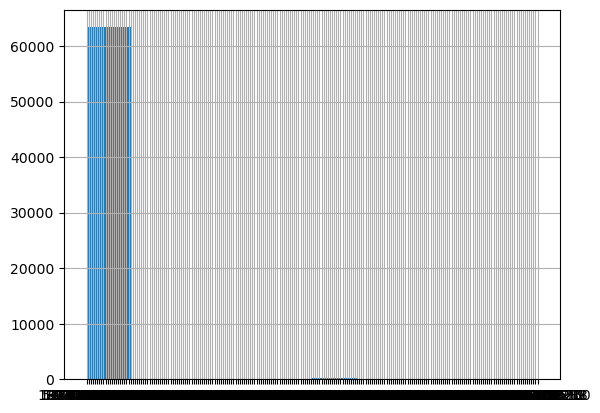

In [9]:
df = ddos_data.loc[:,:]
df["Source IP"].hist()

In [ ]:
df_iris['sepal_length'].hist()


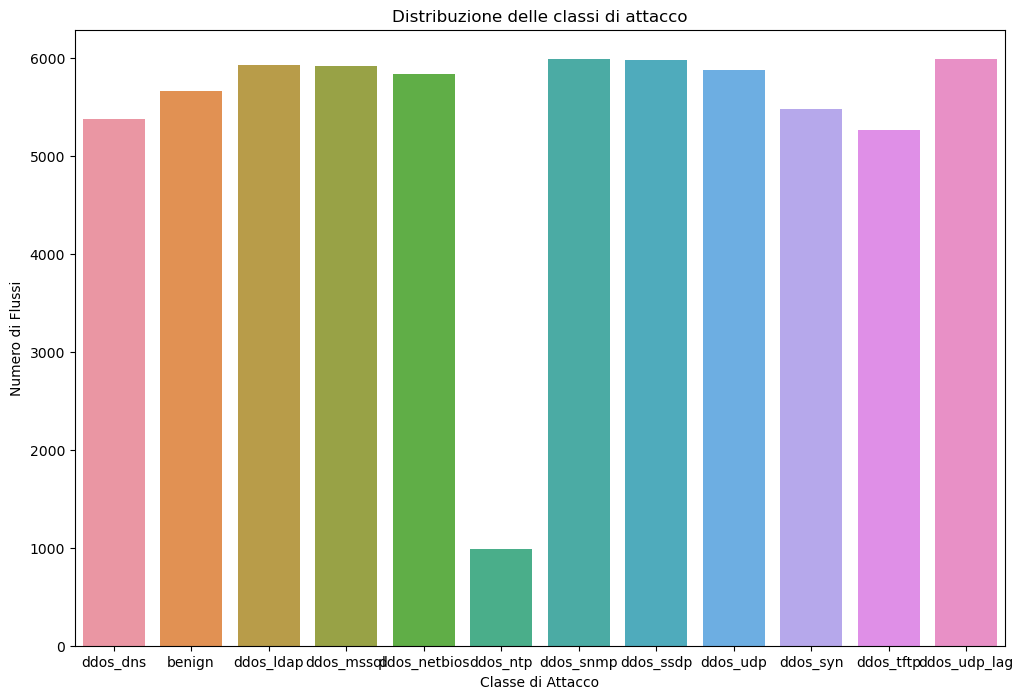

In [10]:
# Visualisation 1: number of flows for each class of attack
plt.figure(figsize=(12,8))
sns.countplot(x="label", data=df)
plt.title("Distribuzione delle classi di attacco")
plt.xlabel("Classe di Attacco")
plt.ylabel("Numero di Flussi")
plt.show()


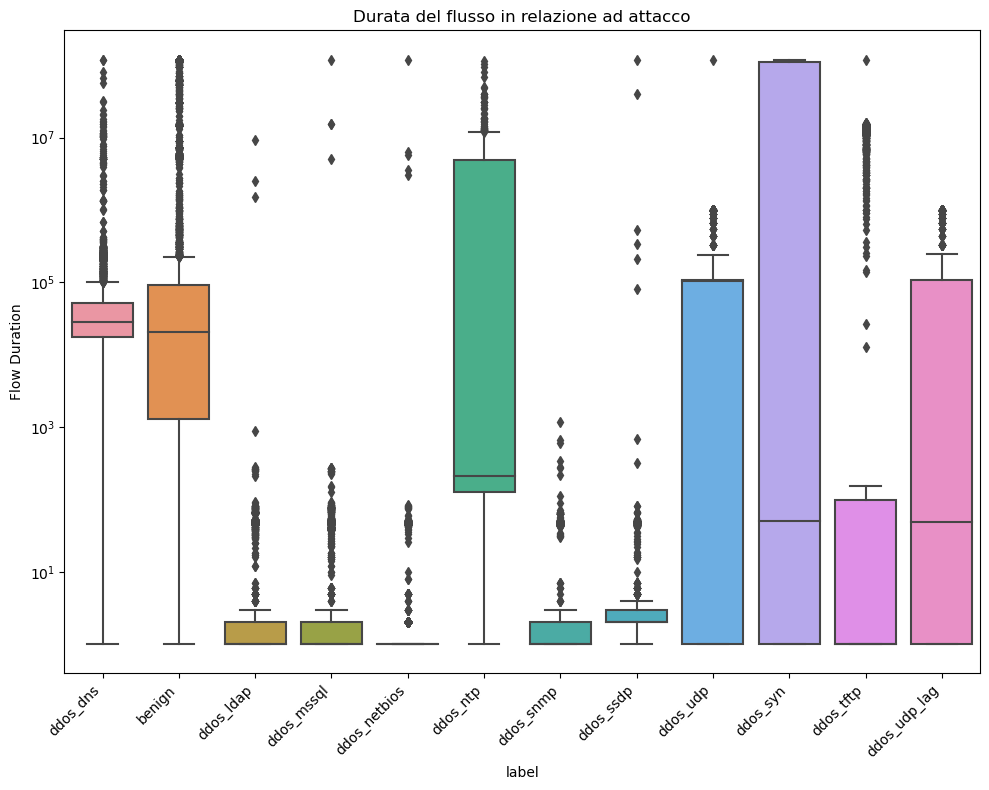

In [14]:
# Flow duration in relation to attack
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df, x='label', y='Flow Duration')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')  # Ruota le etichette
ax.set_yscale('log')  # Imposta la scala logaritmica sull'asse delle y
ax.set_title('Durata del flusso in relazione ad attacco')
plt.tight_layout()  # Assicurati che nulla venga tagliato
plt.show()

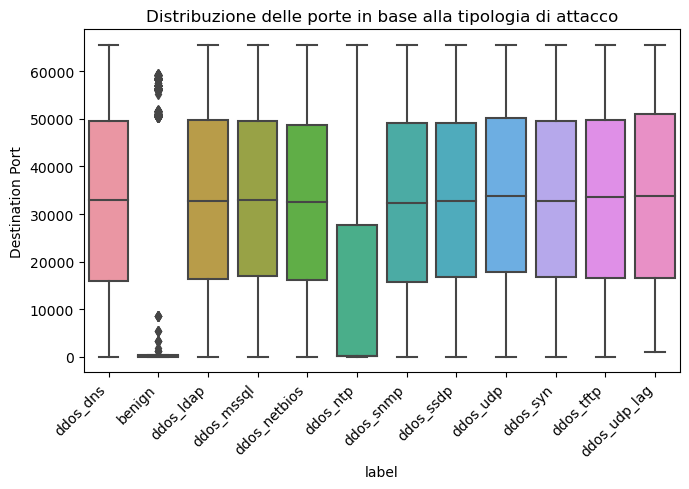

In [42]:
# Distribution of ports according to attack
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=ddos_data, x='label', y='Destination Port')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Distribuzione delle porte in base alla tipologia di attacco')
plt.tight_layout()
plt.show()

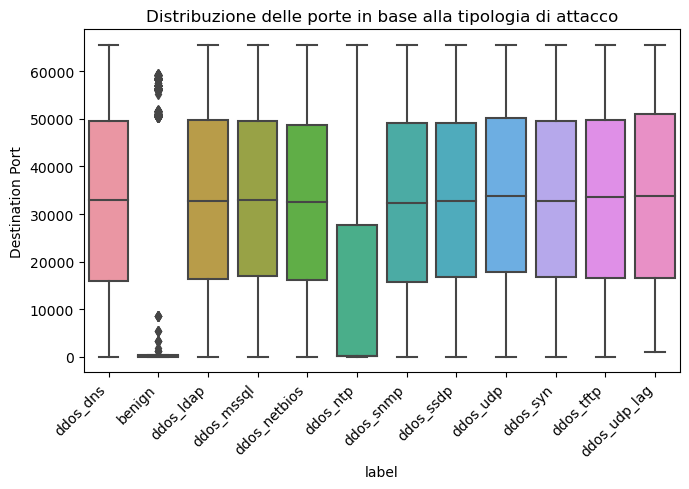

In [42]:
# Packet length according to attack
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=ddos_data, x='label', y='Destination Port')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_title('Distribuzione delle porte in base alla tipologia di attacco')
plt.tight_layout()
plt.show()

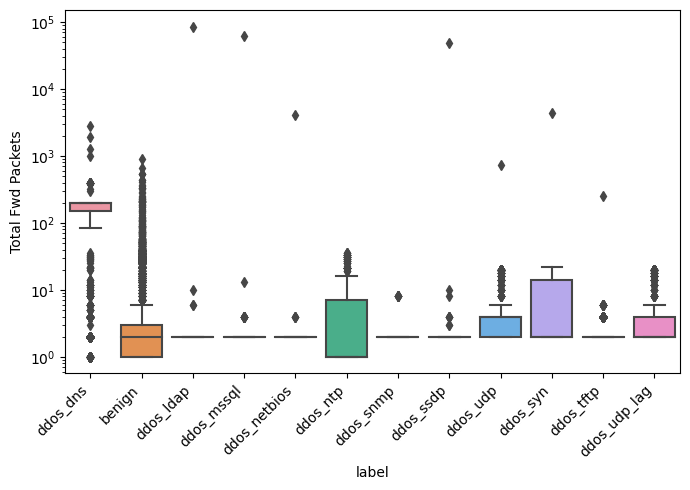

In [66]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=ddos_data, x='label', y='Total Fwd Packets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log',base=10)
plt.tight_layout()
plt.show()

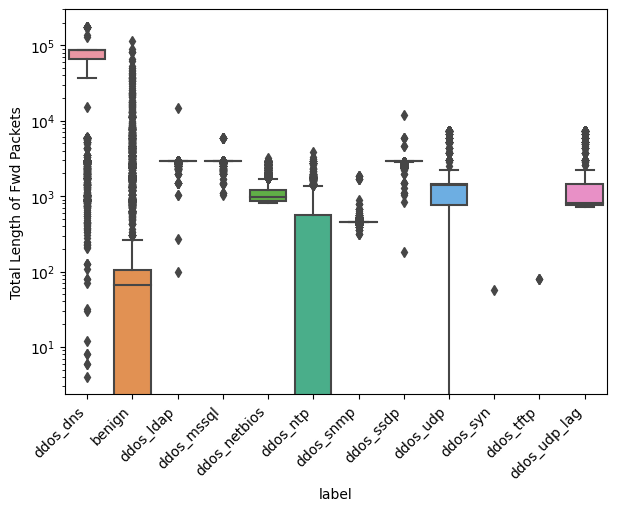

In [67]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, x='label', y='Total Length of Fwd Packets')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log',base=10)
plt.tight_layout()
plt.show()

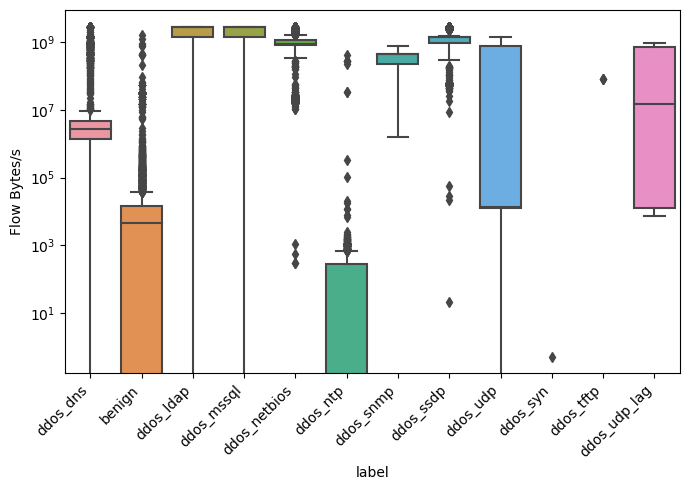

In [72]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, x='label', y='Flow Bytes/s')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log',base=10)
plt.tight_layout()
plt.show()

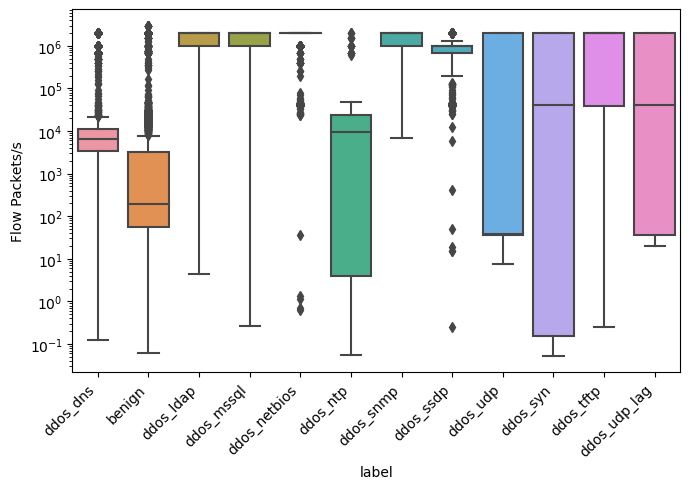

In [70]:
plt.figure(figsize=(7, 5))
ax = sns.boxplot(data=df, x='label', y='Flow Packets/s')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_yscale('log',base=10)
plt.tight_layout()
plt.show()

First conclusions drawn, many features already have mean, deviation, minimum and maximum, we only need to add a few features

In [18]:
ddos_data.groupby(["Source IP","Source Port","Destination IP","Destination Port","Protocol","Timestamp"]).size().sort_values(ascending=False)

Source IP   Source Port  Destination IP   Destination Port  Protocol  Timestamp                 
0.0.0.0     68           255.255.255.255  67                17        2018-12-01 09:18:30.010736    1
172.16.0.5  44879        192.168.50.1     21570             6         2018-12-01 13:34:27.645918    1
            44864        192.168.50.1     44864             6         2018-12-01 13:30:31.091976    1
            44866        192.168.50.1     14094             6         2018-12-01 13:34:27.643921    1
            44868        192.168.50.1     20616             6         2018-12-01 13:34:27.644029    1
                                                                                                   ..
            900          192.168.50.1     30820             17        2018-12-01 11:22:41.288750    1
                                          30826             17        2018-12-01 11:22:41.596097    1
                                          30831             17        2018-12-01 11:22:

## Correlation Matrix

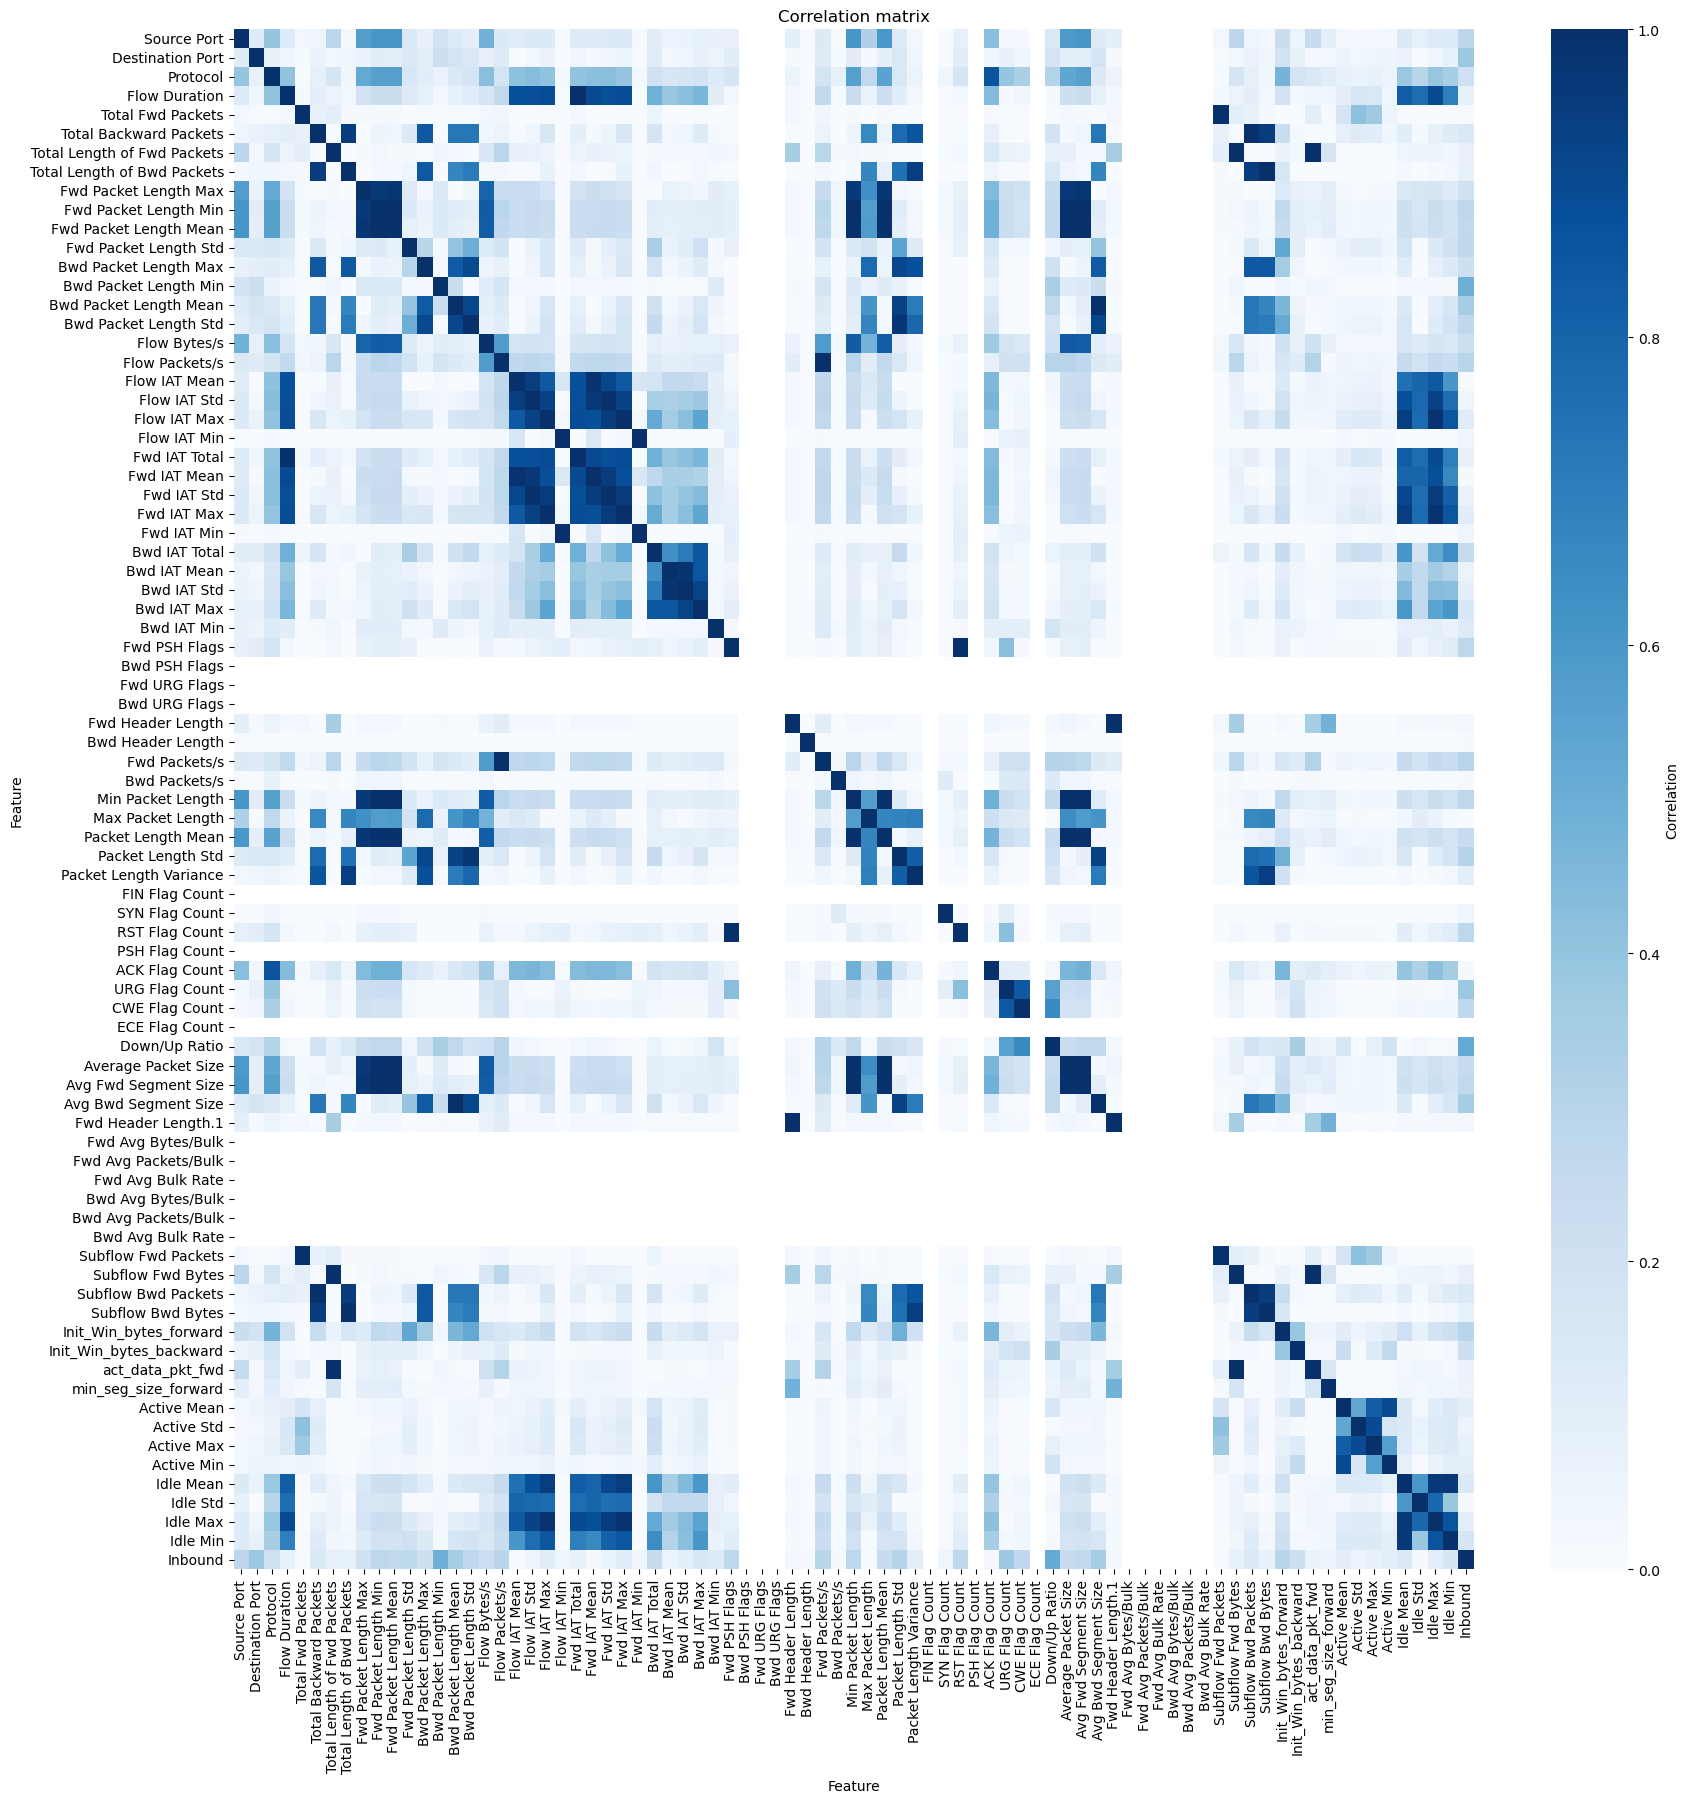

In [76]:
# Objective: to standardise values

ddos_data_copy = ddos_data.copy()
ddos_data_copy.drop(columns=["Unnamed: 0","Flow ID","Destination IP","Source IP","Timestamp","SimillarHTTP","label"],axis=1,inplace=True)


scaler = StandardScaler()
scaler.fit(ddos_data_copy)
features_tmp = scaler.transform(ddos_data_copy)
ddos_data_s = pd.DataFrame(features_tmp, columns=ddos_data_copy.columns)

correlation_matrix = ddos_data_s.corr().abs()

plt.figure(figsize=(20,20))
sns.heatmap(correlation_matrix, cmap='Blues', vmin=.0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()

We note that many columns are empty, so let us assume that it is not possible to calculate the correlation and eliminate the features that have zero variance to see if this is the problem

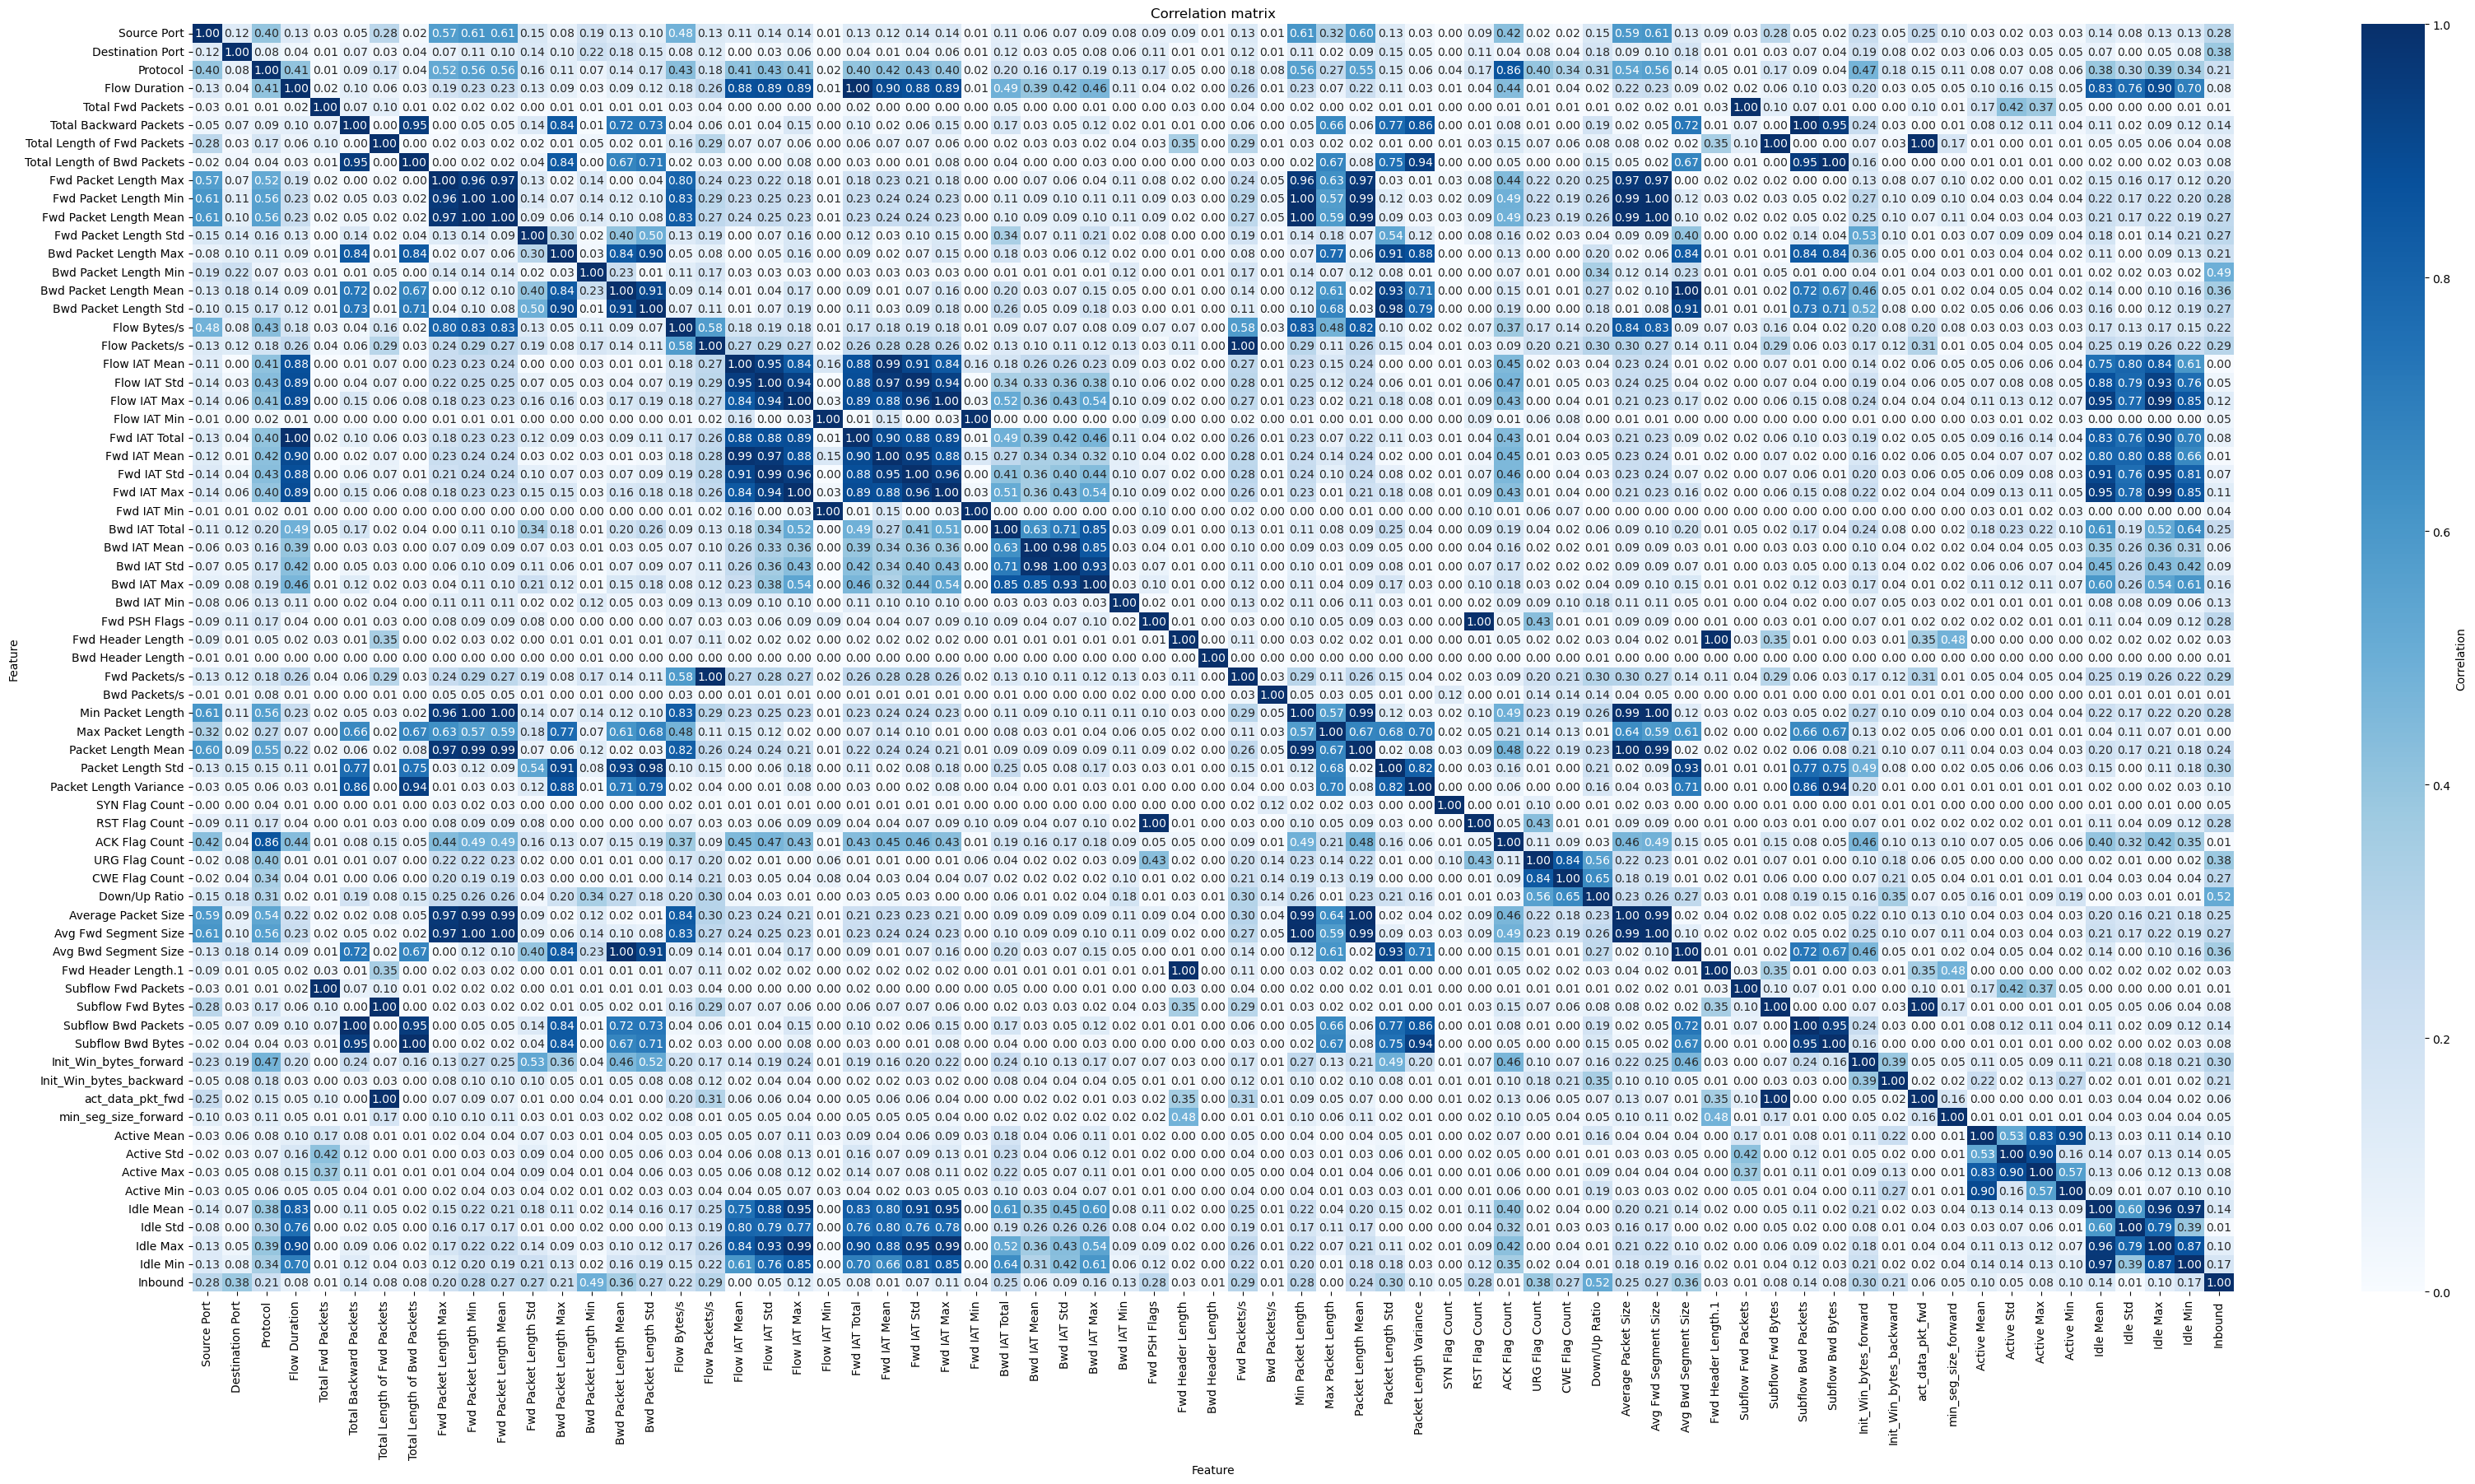

In [97]:

# Variance for each column
varianza = ddos_data_s.var()

# Find columns with zero variance
colonne_con_varianza_zero = varianza[varianza == 0].index

# Remove these columns from the DataFrame
ddos_data_s.drop(colonne_con_varianza_zero, axis=1, inplace=True)


# Correlation matrix
correlation_matrix = ddos_data_s.corr().abs()

# Compute the heatmap
plt.figure(figsize=(40,20))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=.0, vmax=1, cbar_kws={'label':'Correlation'}, fmt='.2f')
plt.xlabel('Feature')
plt.ylabel('Feature')
plt.title('Correlation matrix')
plt.show()


In [3]:
# Extract features having a correlation > 0.8
c = correlation_matrix[correlation_matrix > 0.8]
s = c.unstack()
so = s.sort_values(ascending=False).reset_index()

# Get strongly correlatead features, removing pairs having correlation = 1 because of the diagonal, i.e., correlation between one feature and itself
so = so[(so[0].isnull()==False) & (so["level_0"] != so["level_1"])]
to_be_deleted = []
candidates = list(so["level_0"])

# Get the unique set of features to be deleted
# Notice that we discard one feature per time considering the case where a feature is strongly correlated with multiple features
subset_so = so
for candidate in candidates:
    if (candidate in list(subset_so["level_0"])): 
        to_be_deleted.append(candidate) # add the feature to the removed candidates
        subset_so = subset_so[(subset_so["level_0"] != candidate) & (subset_so["level_1"] != candidate)] # remove the rows that the removed feature is involved

print(len(to_be_deleted), 'features to be removed')
print(sorted(to_be_deleted))

NameError: name 'correlation_matrix' is not defined